# Heart Disease Dataset
In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland
- Hungarian
- Switzerland
- Long Beach VA
- Statlog (Heart) Data Set.
This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment

## Importing Libraries and Data

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

In [14]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Data Cleaning
- remove duplicates
- deal with missing data
- correcting data types

In [15]:
df.shape

(1190, 12)

In [18]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [3]:
# checking for missing data
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
# checking for duplicates
df.duplicated().sum()

272

In [16]:
df = df.drop_duplicates().copy()

In [17]:
df.shape

(918, 12)

## Exploratory Data Analysis
- Data measures of centrality
- Checking if target is unbalanced
- Checking how features relate to each other and target 

In [19]:
# data measures of centrality
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [32]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [ ]:
column_name = ['sex', 'chest pain type', 'fasting blood sugar' ,'resting ecg', 'exercise angina', 'ST slope', 'target']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,15))

for idx, x in enumerate(column_name):
    axs[idx,0].plot()
    

    axs[idx,1]


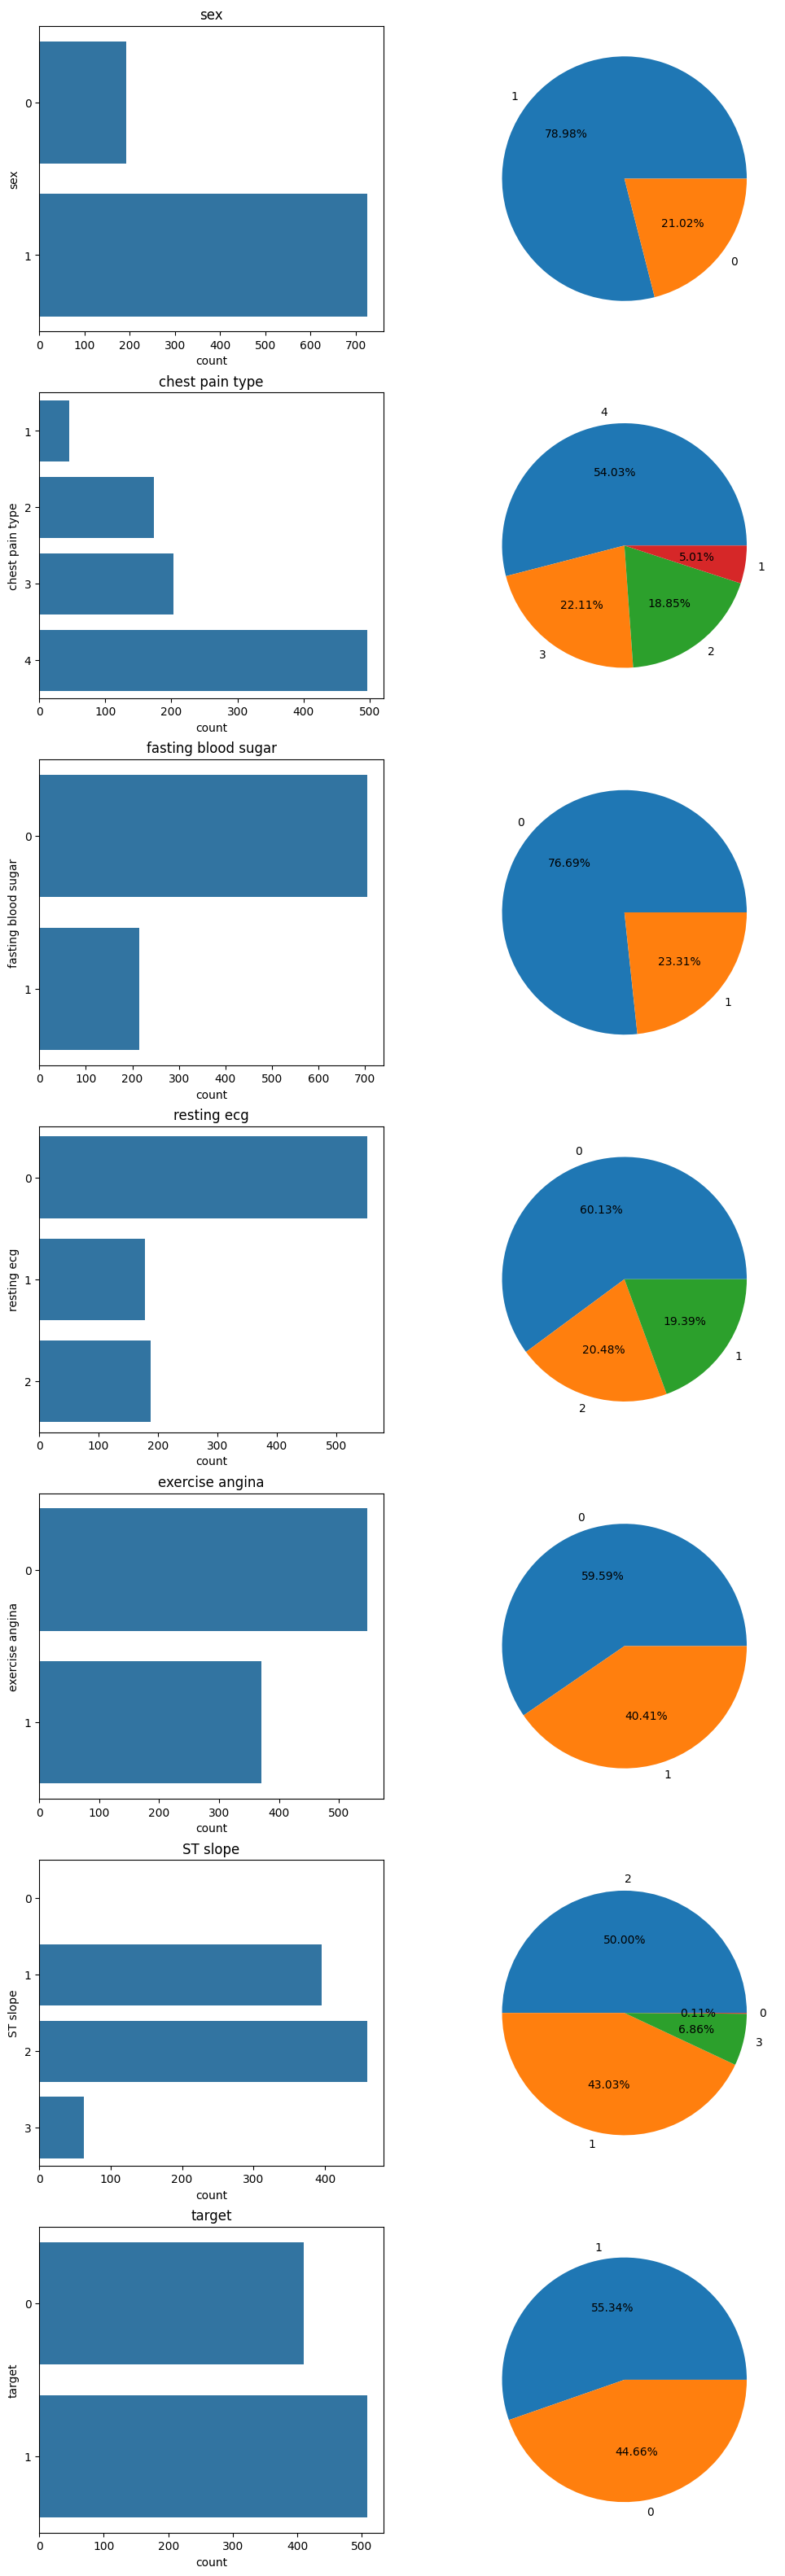

In [61]:
column_name = ['sex', 'chest pain type', 'fasting blood sugar' ,'resting ecg', 'exercise angina', 'ST slope', 'target']
fig = plt.subplots(nrows=7, ncols=2, figsize=(12,40))
n = 1
m = 2

for num in column_name:
    plt.subplot(7,2,n)
    sns.barplot(data=df[num].value_counts(), orient='h')
    plt.title(num)
    n=n+2

    plt.subplot(7,2,m)
    plt.pie(df[num].value_counts(), labels=df[num].value_counts().index, autopct = '%1.2f%%')
    m=m+2

Text(0.5, 1.0, 'Correlation Heatmap for Data')

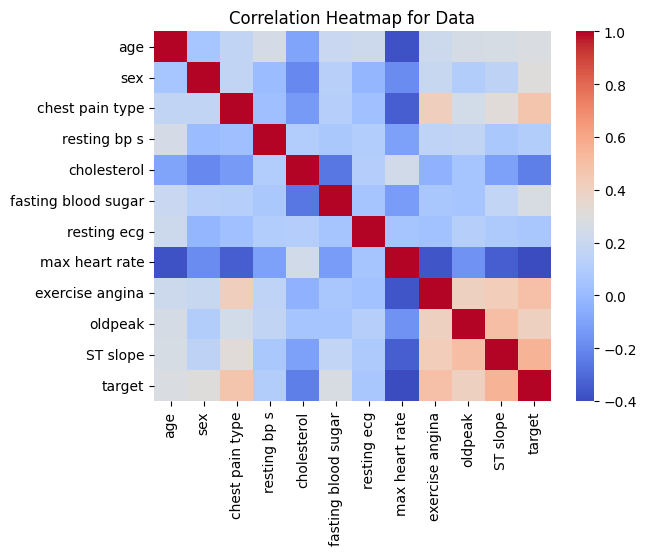

In [114]:
# checking how data correlates
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap for Data")

## Model Development
- split data
- scale data
- build models

In [64]:
# splitting the data
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (734, 11)
y_train shape:  (734,)
X_test shape:  (184, 11)
y_test shape:  (184,)


In [67]:
# scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [144]:
# building models

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbour': KNeighborsClassifier(),
    'XGBoost': XGBRFClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
}
scores = {}
matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    scores[name] = accuracy*100
    matrices[name] = cm
    print(f'{name}: {accuracy*100:.2f}%')
    print(classification_report(y_test, y_pred))
    print('-----------------------------------------------------------------------')


Logistic Regression: 88.04%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        74
           1       0.91      0.89      0.90       110

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

-----------------------------------------------------------------------
Decision Tree: 79.35%
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        74
           1       0.89      0.75      0.81       110

    accuracy                           0.79       184
   macro avg       0.79      0.81      0.79       184
weighted avg       0.81      0.79      0.80       184

-----------------------------------------------------------------------
K Nearest Neighbour: 88.04%
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        74
           1   

In [145]:
# visualising the accuracy scores
df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy'])
df_scores.reset_index(inplace=True)
df_scores.rename(columns={'index':'Model'}, inplace=True)
df_scores.head()

,Model,Accuracy
0,Logistic Regression,88.043478
1,Decision Tree,79.347826
2,K Nearest Neighbour,88.043478
3,XGBoost,88.043478
4,SVC,90.217391


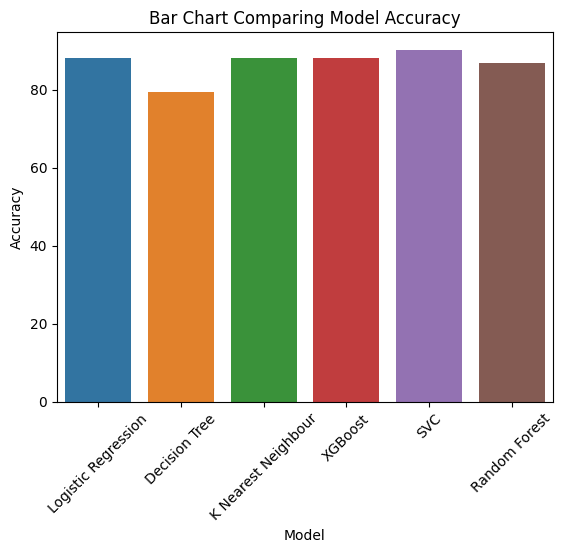

In [146]:
sns.barplot(df_scores, x='Model', y='Accuracy', hue='Model')
plt.xticks(rotation=45)
plt.title("Bar Chart Comparing Model Accuracy")
plt.show()

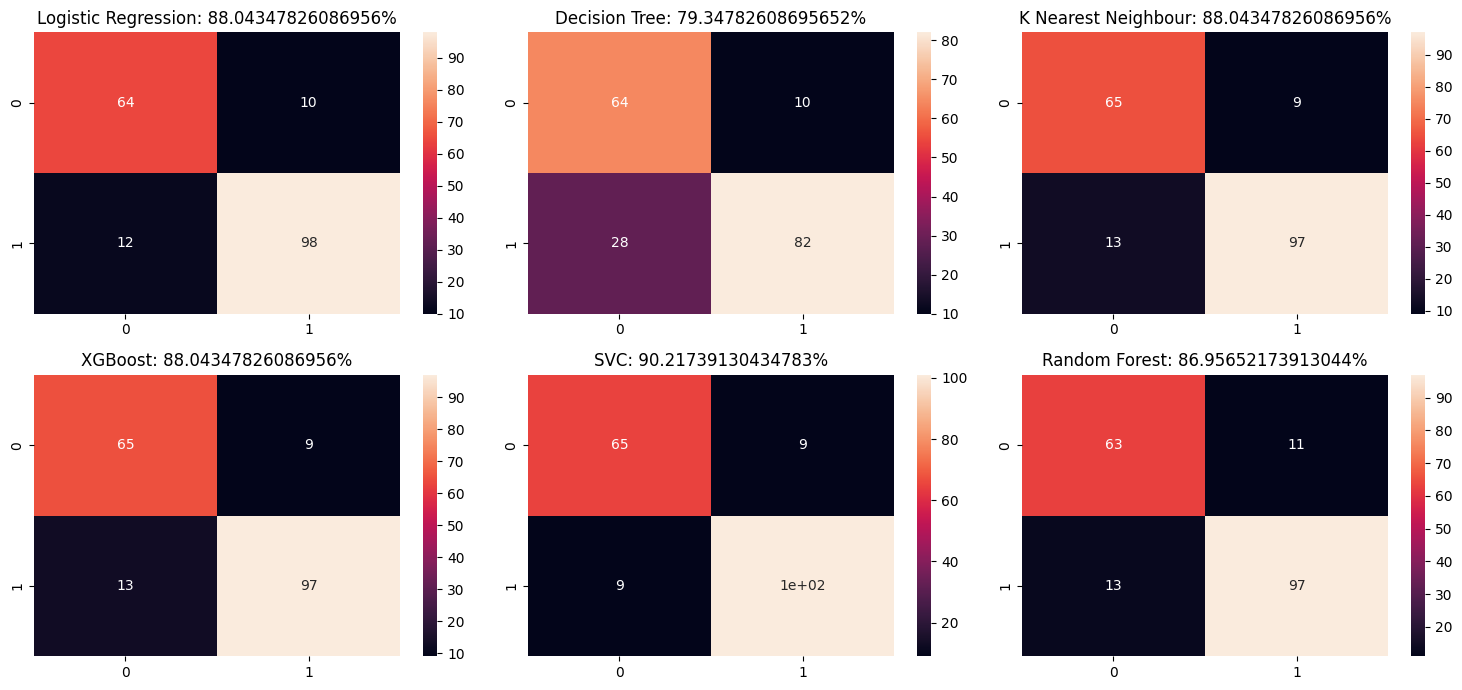

In [149]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
index = 0
mat_names = ['Logistic Regression', 'Decision Tree', 'K Nearest Neighbour', 'XGBoost', 'SVC', 'Random Forest']

for i in range(2):
    for j in range(3):
            sns.heatmap(matrices[mat_names[index]], annot=True, ax=axes[i][j])
            axes[i][j].set_title("{}: {}%".format(mat_names[index], df_scores.iloc[index, 1]))
            index += 1
plt.tight_layout()
plt.show()

### Author : Nokutenda Saungweme